#BIN3100 ML S3

## Théorie: Vidéos

Dans cette leçon nous apprendrons à construire et valider un premier modèle de Machine Learning
Il y a trois vidéos à regarder obligatoirement. Ces vidéos durent un total d'un peu moins d'une heure. Je vous suggère pour en tirer un maximum d'ouvrir un colab pour écrire et exécuter de votre côté le code que le YouTuber écrit.

1. [PYTHON SKLEARN: KNN, LinearRegression et SUPERVISED LEARNING](https://www.youtube.com/watch?v=P6kSc3qVph0&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=20)
2. [PYTHON SKLEARN - MODEL SELECTION : Train_test_split, Cross Validation, GridSearchCV](https://www.youtube.com/watch?v=w_bLGK4Pteo&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=21)
3. [CROSS-VALIDATION SKLEARN PYTHON](https://www.youtube.com/watch?v=VoyMOVfCSfc&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=22)

La vidéo suivante est optionnelle.
4. [MÉTRIQUES de RÉGRESSIONS en DATA SCIENCE](https://www.youtube.com/watch?v=VoyMOVfCSfc&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=23)

##  Une étude de cas: détection du cancer du sein

In [132]:
#import des bibliothèques de base
import numpy as np
import pandas as pd
#import du data wine recognition depuis sklearn
from sklearn import datasets
data = datasets.load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

##Quel objectif initial vous êtes-vous fixé?

<font color='red'> Répondez à cette question ici

---




##Exploration des données

Exploratory Data Analysis

Objectif: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.


1.   Analyse de la forme:

  a. Identification de la target: <font color='red'> Quel est votre target? data.target</font>

  b. Nombre des lignes et de colonnes: <font color='red'> Quelle est la forme de votre dataset?</font>

  c. Types de variables: <font color='red'> Quelles sont les types de vos données? des int</font>

2.   Analyse du fond:

  a. Visualisation de la target <font color='red'>

	b. Compréhension des différentes variables



<font color='red'>Analyse de la forme: Répondez-ici </font>




<font color='red'> Analyse de fond Répondez-ici </font>

##Construisez votre modèle ici

Utilisez un knn pour pour pour créer un premier modèle.

Essayez de produire du code le plus indépendant possible du modèle utilisé.

In [133]:
#import des bibliothèques de base
import numpy as np
import pandas as pd
#import du data wine recognition depuis sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
data = datasets.load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

##Testez votre modèle ici

Mesurez la performance du modèle.



In [134]:
model.score(X_test, y_test)

0.9122807017543859

## La meilleure valeur de voisins

Écrivez un programme qui permet de trouver la meilleure valeur de voisin n_neighbors possible pour le modele de KNeighborsClassifier.

In [135]:
param_grid = {'n_neighbors': np.arange(1, 20)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

model = grid.fit(X_train, y_train)

print("best score", grid.best_score_)
print("best params", grid.best_params_)


best score 0.9362637362637363
best params {'n_neighbors': 4}


## Learning curve

A l'aide de la learning curve, essayez de voir à partir de combien d'exemple le modèle n'améliore plus vraiment ses performances.

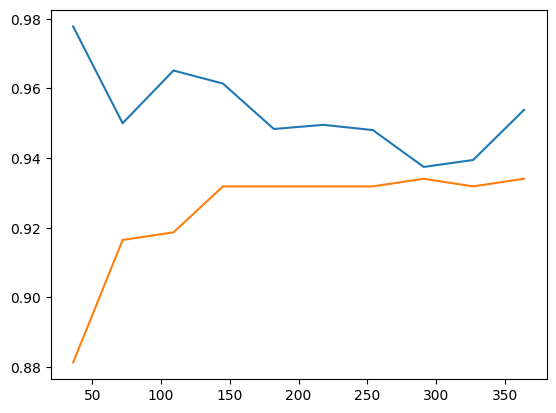

In [136]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 5)

plt.plot(N, train_score.mean(axis = 1), label = 'train')
plt.plot(N, val_score.mean(axis = 1), label = 'val')

## Decision Tree
Faites un nouveau modèle à l'aide d'un arbre de décision et comparez les performances avec le knn.

In [137]:
from sklearn.tree import DecisionTreeClassifier

#GRID POUR NEIGHBORS
param_grid_neighbors = {'n_neighbors': np.arange(1, 20)}
grid_neighbors = GridSearchCV(KNeighborsClassifier(), param_grid_neighbors, cv = 5)

grid_neighbors.fit(X_train, y_train)

neighbors_model = grid_neighbors.best_estimator_

print("best score", grid_neighbors.best_score_)
print("best params", grid_neighbors.best_params_)
print()

#GRID POUR TREE
param_grid_tree = {'max_depth': np.arange(1, 10)}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv = 5)

grid_tree.fit(X_train, y_train)

tree_model = grid_tree.best_estimator_

print("best score", grid_tree.best_score_)
print("best params", grid_tree.best_params_)
print()

#CROSS VAL SCORE
print("Neighbors train", cross_val_score(neighbors_model, X_train, y_train, cv = 5, scoring = 'accuracy').mean())
print("Neighbors test", cross_val_score(neighbors_model, X_test, y_test, cv = 5, scoring = 'accuracy').mean())

print()

print("Decision tree train", cross_val_score(tree_model, X_train, y_train, cv = 5, scoring = 'accuracy').mean())
print("Decision tree test", cross_val_score(tree_model, X_test, y_test, cv = 5, scoring = 'accuracy').mean())

best score 0.9362637362637363
best params {'n_neighbors': 4}

best score 0.945054945054945
best params {'max_depth': 8}

Neighbors train 0.9362637362637363
Neighbors test 0.8849802371541502

Decision tree train 0.945054945054945
Decision tree test 0.9213438735177867


# Repérage des variables redondantes
A l'aide de la matrice corrélation, repérer les variables qui sont fortement corrélées.


# Elimination des variables redondantes
Choisissez des variables à éliminer et refaîtes un entrainement sur le KNN. Observez le changement de performances.